In [21]:
import csv
import random
def generate(label_path, train_save_path, val_save_path, rate=0.8):
    all_id = []
    with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip()
                id1, id2, score = line.split('\t')
                all_id.append([id1, id2, score])
    
    id_train_set = set()
    random.shuffle(all_id)
    l = int(len(all_id) * rate)
    print(len(all_id))
    id_train = [_ for _ in all_id[:l]]
    
    id_val = []
    for id1, id2, score in id_train:
        id_train_set.add(id1)
        id_train_set.add(id2)
    for id1, id2, score in all_id[l:]:
        if (id1 not in id_train_set) and (id2 not in id_train_set):
            id_val.append([id1, id2, score])
        else:
            id_train.append([id1, id2, score])
    print('the ratio for val is {:.4f}'.format(len(id_val) / len(all_id)))
    print(len(id_train), len(id_val), len(all_id))
    with open(train_save_path, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(id_train)
    with open(val_save_path, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(id_val)
    print('saving done !')

label_path = './data/pairwise/label.tsv'
train_save_path = './k_fold_data/fold_train.csv'
val_save_path = './k_fold_data/fold_val.csv'

generate(label_path, train_save_path, val_save_path)

67899
the ratio for val is 0.0617
63708 4191 67899
saving done !


In [26]:
import collections
def divide(tuple_list):
  list_set = []
  near_list = collections.defaultdict(list)
  for id1, id2, score in tuple_list:
    near_list[id1].append(id2)
    near_list[id2].append(id1)
  
  def dfs(visit, id, near_list):
    if id in visit:
      return 
    visit.add(id)
    for next_id in near_list[id]:
      dfs(visit, next_id, near_list)
  
  visit = set()
  for id in near_list:
    if id in visit:
      continue
    new_visit = set()
    dfs(new_visit, id, near_list)
    visit |= new_visit
    list_set.append(new_visit)
  count = 0
  for set1 in list_set:
    for id in set1:
      count += 1
  print('graph of count = ', len(list_set))
  print(count)
  print(len(tuple_list))
  info = []
  for g_id, g_list in enumerate(list_set):
    for id in g_list:
      info.append((id, g_id))
  info_df = pd.DataFrame(info, columns=["id", "g_id"])
  info_df.to_csv("result/graph_info.csv", index=0)

In [27]:

all_id = []
label_path = './data/pairwise/label.tsv'
with open(label_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        id1, id2, score = line.split('\t')
        all_id.append([id1, id2, score])



In [28]:

import sys  # 导入sys模块
sys.setrecursionlimit(300000)  # 将默认的递归深度修改为3000
divide(all_id)

graph of count =  22040
63613
67899


In [34]:
g_info = pd.read_csv("result/graph_info.csv")
g_info.head()

,id,g_id
0,1678680891334647162,0
1,5254540759602646446,0
2,5650850144185148846,0
3,1462507261765473658,0
4,4443891407593706926,0


<AxesSubplot:>

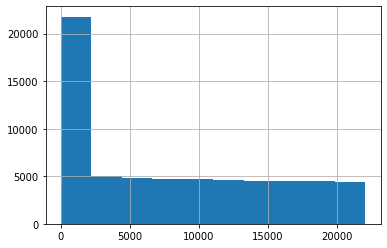

In [35]:
# g_info = g_info.groupby('g_id')
g_info['g_id'].hist()

In [1]:
import pandas as pd
g_info = pd.read_csv("result/graph_info.csv")
g_info.head()

,id,g_id
0,1678680891334647162,0
1,5254540759602646446,0
2,5650850144185148846,0
3,1462507261765473658,0
4,4443891407593706926,0


<AxesSubplot:>

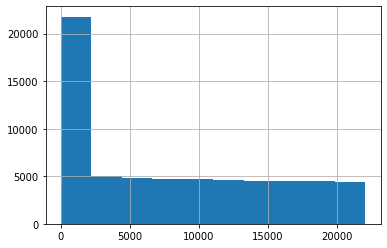

In [4]:
g_info['g_id'].hist()

In [32]:
import random
g_counts = g_info['g_id'].value_counts()
g_counts_list = list(zip(g_counts.index, g_counts.values))
count = 0
end = []
tmp = []
count_sum = []
# random.shuffle(g_counts_list[1:])
for index, value in g_counts_list:
    tmp.append(index)
    if count + value > 12000:
        end.append(tmp[:])
        count_sum.append(count + value)
        tmp = []
        count = 0
    else:
        count += value
end.append(tmp[:])
count_sum.append(count)
for i in end:
    print(len(i))
# print(end)
print(count_sum)



1
4565
6001
6001
5472
[16664, 12001, 12002, 12002, 10944]


In [2]:
pairwise_score = pd.read_csv("result/pairwise_score.csv")
pairwise_score.head()

,id_1,id_2,score
0,2345203561710400875,5344606281729891758,1.00
1,759945328762912122,5560784129870034298,0.85
2,2336209090533711226,8010747189096226170,1.00
3,2588403135132530094,5380633252649788846,0.25
4,3245934094259209594,120437073895839098,1.00


In [1]:
import pandas as pd
pairwise_score = pd.read_csv("result/pairwise_score.csv")
pairwise_score.head()

,id_1,id_2,score
0,2345203561710400875,5344606281729891758,1.00
1,759945328762912122,5560784129870034298,0.85
2,2336209090533711226,8010747189096226170,1.00
3,2588403135132530094,5380633252649788846,0.25
4,3245934094259209594,120437073895839098,1.00


In [2]:
pairwise_score_sample = pairwise_score.sample(frac=1)
pairwise_score_sample.head()

,id_1,id_2,score
47019,5948098268056849786,1489534546038654382,0.50
67160,1444471203054691758,30359730352438702,1.00
51793,1687686739764616622,3714302657193532846,0.00
123,1462507362235565419,3804367760910527918,0.10
21108,12324978793823662,3525151472894434734,0.75


In [5]:
rate=0.4
p_len = len(pairwise_score_sample)
train_set = pairwise_score_sample[:int(p_len*0.4)]

In [39]:
k_fold = pd.merge(left=pairwise_score, right=g_info, how='left', left_on='id_1', right_on='id')
k_fold = k_fold.drop(['id'], axis=1)
def find_k (x):
    k = -1
    for k, item in enumerate(end):
        if x in item:
            return k
k_fold['fold']= k_fold['g_id'].apply(lambda x : find_k(x))
k_fold

,id_1,id_2,score,g_id,fold
0,2345203561710400875,5344606281729891758,1.00,0,0
1,759945328762912122,5560784129870034298,0.85,1,4
2,2336209090533711226,8010747189096226170,1.00,2,3
3,2588403135132530094,5380633252649788846,0.25,0,0
4,3245934094259209594,120437073895839098,1.00,3,3
...,...,...,...,...,...
67894,3750336164790283694,6578593639340324218,0.50,22038,2
67895,4587992807793958251,3651241564586845614,0.05,0,0
67896,4939290286258343342,2750529751830584750,0.00,22039,4
67897,7461297012077098362,5939084830845425070,1.00,401,1


In [44]:
k_fold.to_csv('result/k_fold.csv')

<AxesSubplot:>

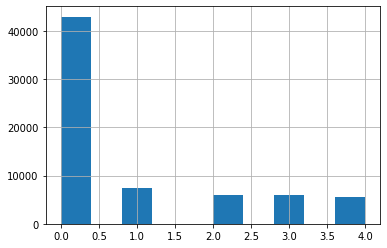

In [2]:
import pandas as pd
pd.read_csv('result/k_fold.csv')['fold'].hist()